In [20]:
import numpy as np
import pandas as pd
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
data = randn(25)

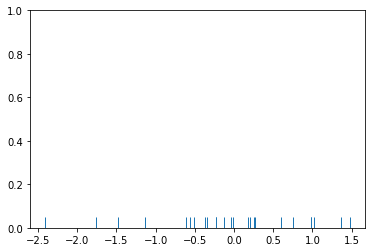

In [22]:
sns.rugplot(data)



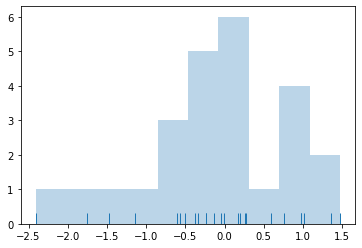

In [23]:
plt.hist(data,alpha = 0.3)
sns.rugplot(data)

(0, 1)

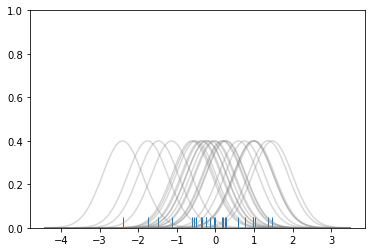

In [24]:
sns.rugplot(data)

x_min = data.min() - 2
x_max = data.max() + 2

x_axis = np.linspace(x_min,x_max,100)
bandwidth = ((4*data.std()**5)/ (3*len(data)))**0.2

kernel_list = []

for data_point in data:
    
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel/kernel.max()
    kernel = kernel*0.4
    
    plt.plot(x_axis,kernel,color = 'grey',alpha = 0.3)
    
plt.ylim(0,1)    
    

In [25]:
bandwidth

0.5185220564304933

AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

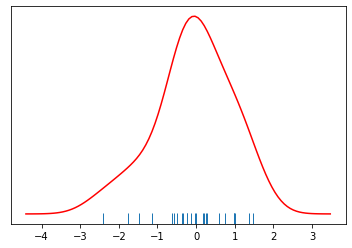

In [26]:
sum_of_kde = np.sum(kernel_list,axis = 0)
fig = plt.plot(x_axis,sum_of_kde, color = 'red')
sns.rugplot(data)
plt.yticks([])
plt.subtitle('Sum of the basis functions')

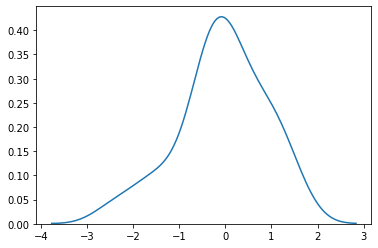

In [27]:
sns.kdeplot(data)

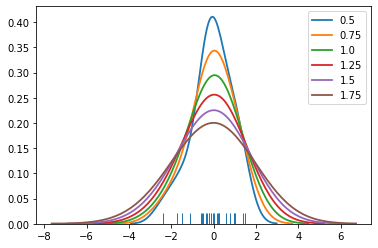

In [28]:
sns.rugplot(data)

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(data,bw = bw,lw = 1.8, label = bw)

In [29]:
#to study Kernel, refer to the link: https://en.wikipedia.org/wiki/Kernel_(statistics)

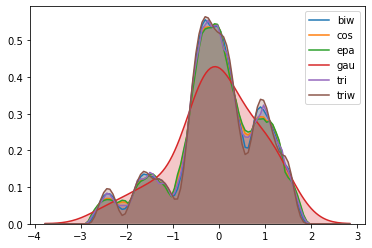

In [30]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
     sns.kdeplot(data,kernel = kern, label = kern, shade = True)

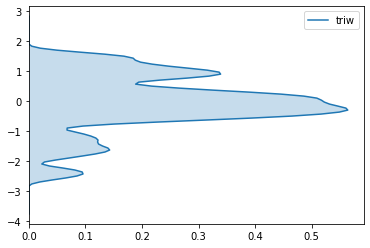

In [36]:

sns.kdeplot(data,vertical = True,kernel = kern, label = kern, shade = True)

In [38]:
# To know about CD, refer http://en.wikipedia.org/wiki/Cumulative_distribution_function



C:\Users\Apoorv\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


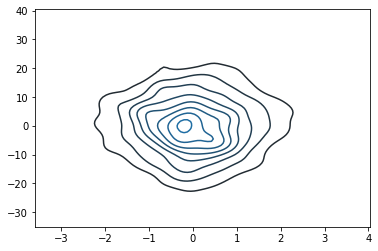

In [41]:
mean = [0,0]
cov = ([1,0],[0,100])
data2 = np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(data2,columns = ['X','Y'])

sns.kdeplot(dframe)

sns.kdeplot(dframe.X,dframe.Y)

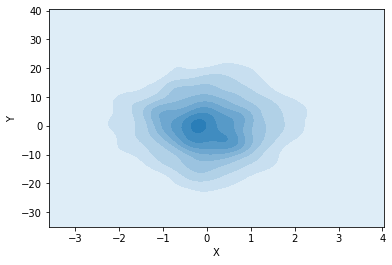

In [43]:
sns.kdeplot(dframe.X,dframe.Y, shade = True)

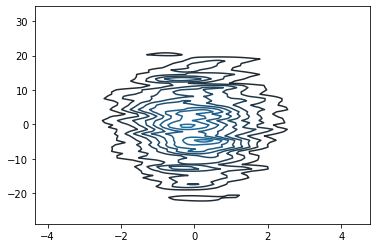

In [48]:
sns.kdeplot(dframe,bw=0.5)

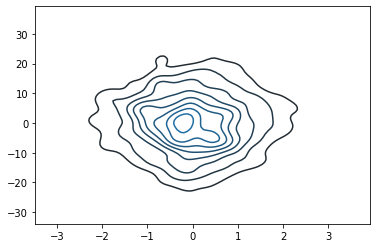

In [49]:
sns.kdeplot(dframe,bw = 'silverman')

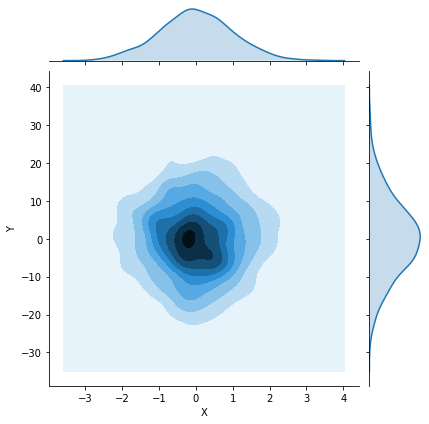

In [50]:
sns.jointplot('X','Y',dframe,kind = 'kde')